# Heatmaps

Heatmaps are a way to visualize three-dimensions of data and to take advantage of spatial proximity of those dimensions.
It should be used to find patterns on continuous data it is not meant for categorical data

In [24]:
# Let's bring in matplotlib and numpy, as well as pandas and some date time functionality
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [25]:
# In this example I want to show you some traffic data from New York City, which is
# all available from NYC open data portal.
df=pd.read_csv("NYC hourly traffic.csv")

# I'm going to convert the date column into a date and time
df["Date"]=df["Date"].apply(pd.to_datetime)

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368


In [26]:
sample_to_work_on = df.query("`Plaza ID`==5 & Date>'2016-12-30' & Date<'2017-05-01'") #It is important to use backticks because Plaza ID column has a whitespace in between
sample_to_work_on.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16


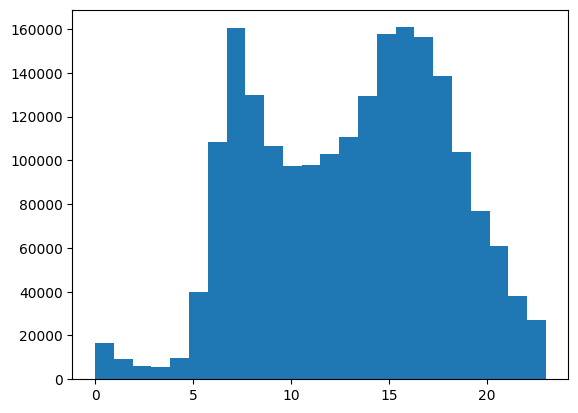

In [27]:
plt.hist(sample_to_work_on['Hour'],bins=24,weights=sample_to_work_on['# Vehicles - E-ZPass'])
plt.show()
#Also it is important to indicate the hourly data is ordered in hours this is why we can see this clear

### As we can see the 5-10am and 15-17 hours are bigger in weight which helps us conclude these are rush hours for traffic

#### I also want to find which days are more crowded to do this i have to retrieve day of the data

C:\Users\eren\AppData\Local\Temp\ipykernel_13940\1519595890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_to_work_on['Day of Week'] = sample_to_work_on['Date'].dt.day_of_week #taking days as numeric value from date data


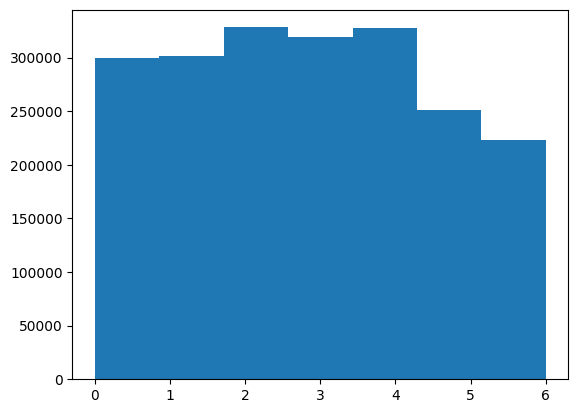

In [28]:
sample_to_work_on['Day of Week'] = sample_to_work_on['Date'].dt.day_of_week #taking days as numeric value from date data

plt.hist(sample_to_work_on['Day of Week'],bins=7,weights=sample_to_work_on['# Vehicles - E-ZPass'])
plt.show()

### The weekends of course has less traffic compared to weekdays
#### Lets combine this tho conclusions about hour and weekdays in heatmap can be reffered as 2dhistogram


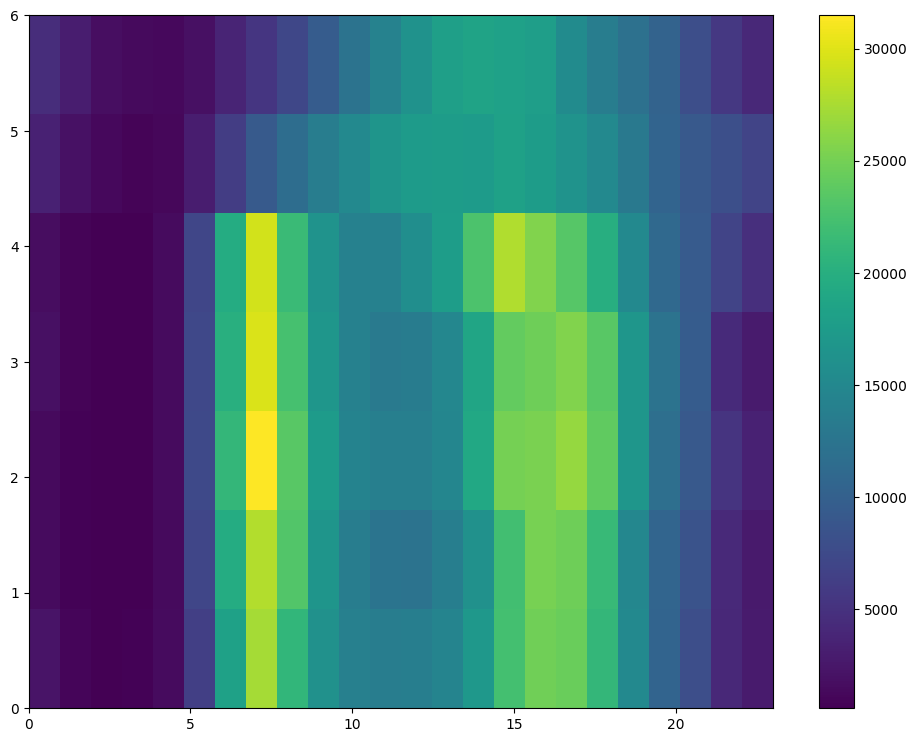

In [29]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax = plt.hist2d(
    sample_to_work_on['Hour'], #first dimensional data includes 24 bins
    sample_to_work_on['Day of Week'], #second dimensional data has 7 bins
    bins=[24,7], #i am taking bins as a list of 24 and 7 because there are 24 hours and 7 days in a week considering the data given with order 
    weights=sample_to_work_on['# Vehicles - E-ZPass'],
)
plt.colorbar()
plt.show()



Great! So lets disect this. First, we see that across all days (our y axis) the first four or so hours of the day are dark blue (this is the first four columns or so), indicating relatively little traffic. Then we see that for the days 0 through 4 we get a spike in traffic, shown as more yellow intensity cells in the image, but this isn't really true for the last two days of the week (the weekend - the top two rows).

Time data is an interesting case for using heat maps, because we often have cycles of activity within a time period -- in this case weeks -- and that allows us to have two ordered dimensions.

#### Now i'll be making analysis based on months and week of that month


In [30]:
#i have to get the month data from timestamp column
sample_to_work_on['Month of Year'] = sample_to_work_on['Date'].dt.month
sample_to_work_on.head()

C:\Users\eren\AppData\Local\Temp\ipykernel_13940\2938417437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_to_work_on['Month of Year'] = sample_to_work_on['Date'].dt.month


,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Day of Week,Month of Year
735652,5,2017-04-29,0,I,216,25,5,4
735653,5,2017-04-29,0,O,100,23,5,4
735654,5,2017-04-29,1,I,111,21,5,4
735655,5,2017-04-29,1,O,53,18,5,4
735656,5,2017-04-29,2,I,72,16,5,4


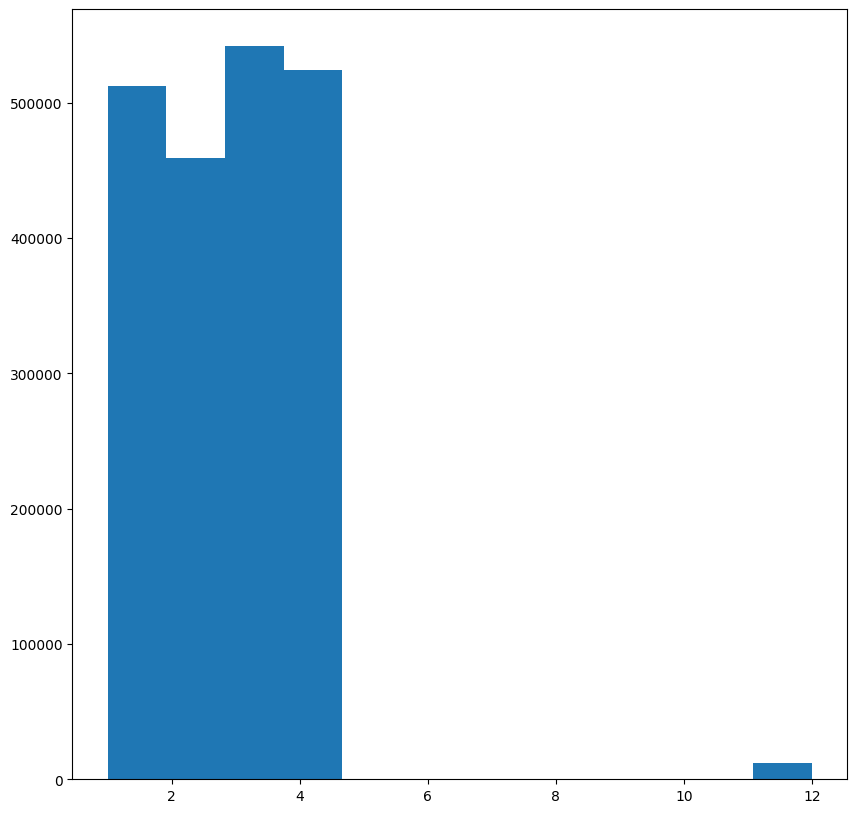

In [31]:
fig2 = plt.figure(figsize=(10,10))

ax1 = fig2.add_subplot(111)

ax1 = plt.hist(
    sample_to_work_on['Month of Year'],
    bins=12,
    weights=sample_to_work_on['# Vehicles - E-ZPass']
)

plt.show()


### Important : there is something off with that table looks like some of values are missing remember i only retrieved data only including first half of 2017 lets take other part too

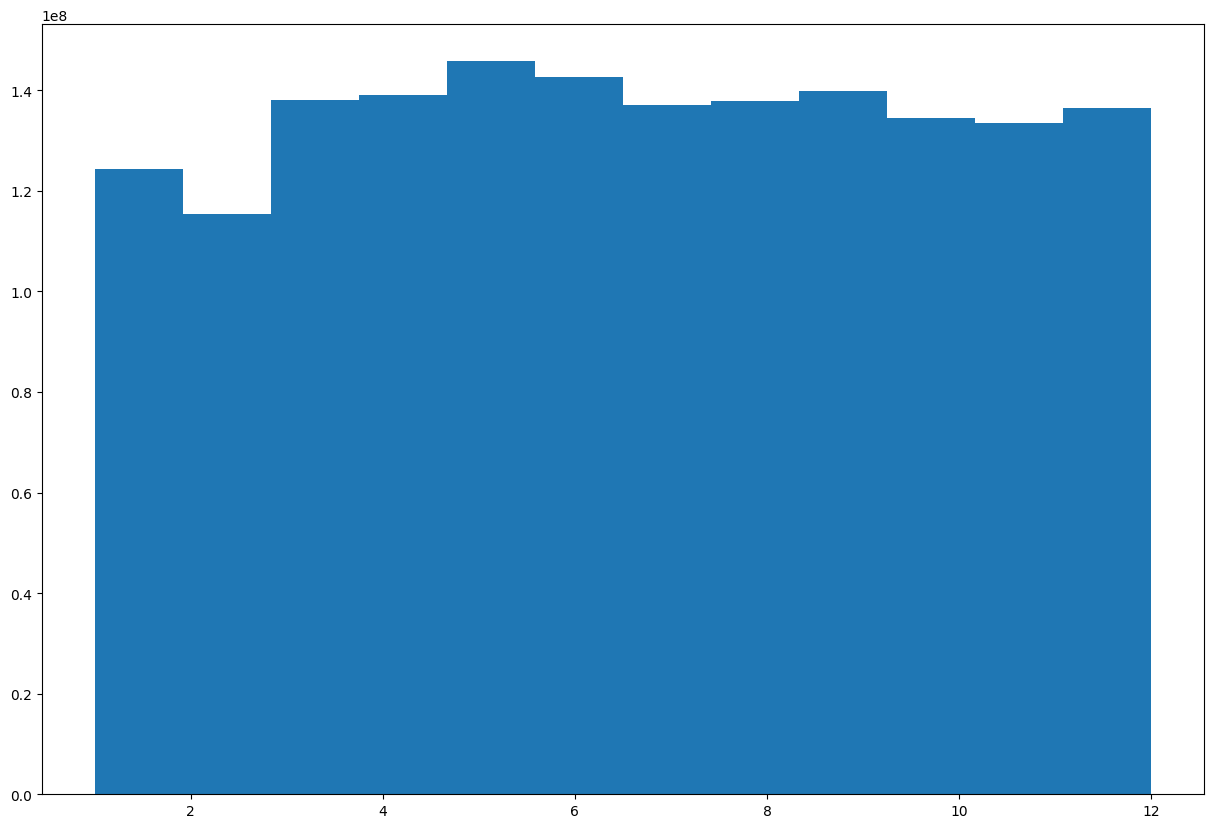

In [32]:
s1 = df[df['Date']<'2017-12-31'] #I can also retrieve the wanted part of data using boolean masking and loc method too.

sample_to_work_on = pd.concat([sample_to_work_on,s1],axis=0,ignore_index=True) # This line will concantinate two dataframes in one in other. ignore_index parameter
                                                                               # will ignore the index of the second dataframe and just continues index of the first dataframe

sample_to_work_on['Month of Year'] = sample_to_work_on['Date'].dt.month #Taking month of date as numeric value
fig2 = plt.figure(figsize=(15,10))

ax1 = fig2.add_subplot(111)

ax1 = plt.hist(
    sample_to_work_on['Month of Year'],
    bins=12, #I am taking bins to 12 because there are 12 months
    weights=sample_to_work_on['# Vehicles - E-ZPass']
)

plt.show()

In [33]:
sample_to_work_on.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Day of Week,Month of Year
0,5,2017-04-29,0,I,216,25,5.0,4
1,5,2017-04-29,0,O,100,23,5.0,4
2,5,2017-04-29,1,I,111,21,5.0,4
3,5,2017-04-29,1,O,53,18,5.0,4
4,5,2017-04-29,2,I,72,16,5.0,4


## Now I'm going to look forward to analyse week of that spesific month
#### Unfortunately there is no implemented function for this kind of problem ,to do this i will create a function which gets week rank of that date

In [34]:
import math
def get_week_of_month(date):
   first_day = date.replace(day=1)

   day_of_month = date.day

   if(first_day.weekday() == 6):
       adjusted_dom = (1 + first_day.weekday()) / 7
   else:
       adjusted_dom = day_of_month + first_day.weekday()

   return int(math.ceil(adjusted_dom/7.0))

sample_to_work_on['Week of Month'] = sample_to_work_on['Date'].apply(get_week_of_month)
sample_to_work_on.head(10)

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Day of Week,Month of Year,Week of Month
0,5,2017-04-29,0,I,216,25,5.0,4,5
1,5,2017-04-29,0,O,100,23,5.0,4,5
2,5,2017-04-29,1,I,111,21,5.0,4,5
3,5,2017-04-29,1,O,53,18,5.0,4,5
4,5,2017-04-29,2,I,72,16,5.0,4,5
5,5,2017-04-29,2,O,32,14,5.0,4,5
6,5,2017-04-29,3,I,40,15,5.0,4,5
7,5,2017-04-29,3,O,26,16,5.0,4,5
8,5,2017-04-29,4,I,45,12,5.0,4,5
9,5,2017-04-29,4,O,43,9,5.0,4,5


In [35]:
sample_to_work_on['Week of Month'].unique()

array([5, 4, 3, 2, 1, 6], dtype=int64)

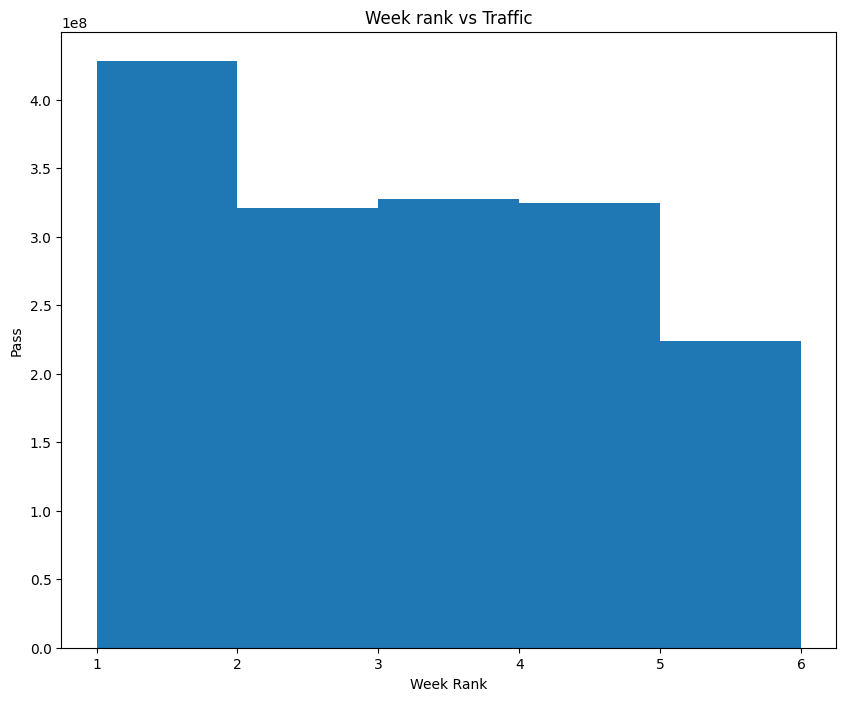

In [36]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)

ax = plt.hist(
    sample_to_work_on['Week of Month'],
    bins=5, #because max week a month can hold is 6
    weights=sample_to_work_on['# Vehicles - E-ZPass']
)
plt.title('Week rank vs Traffic')
plt.xlabel('Week Rank')
plt.ylabel('Pass')

plt.show()

## Combining Month and week data to a heatmap:

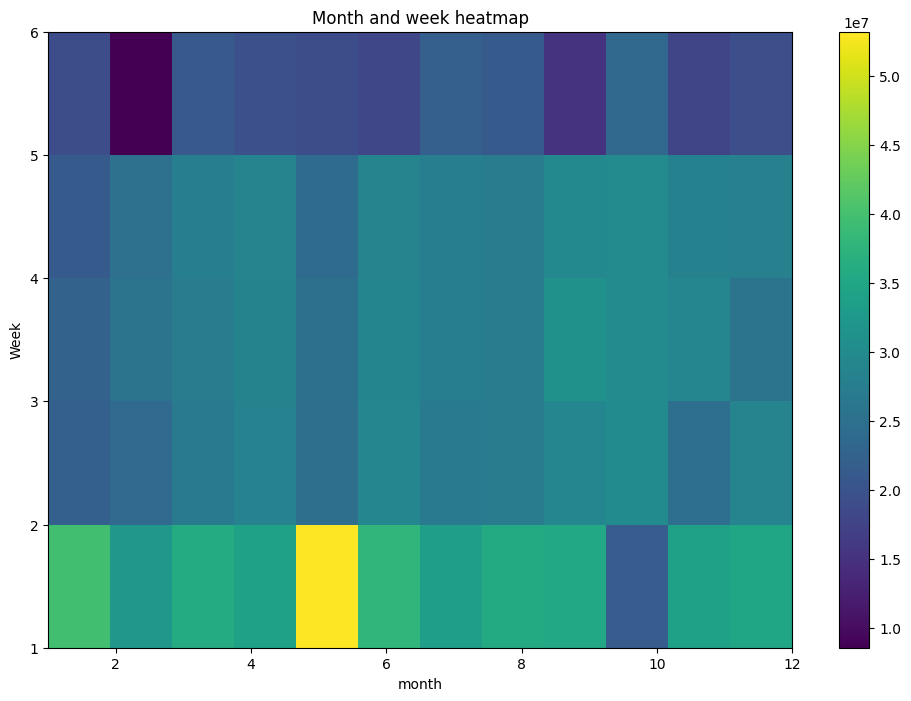

In [37]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

ax = plt.hist2d(
    sample_to_work_on['Month of Year'],
    sample_to_work_on['Week of Month'],
    bins=[12,5], #the combined range of both is this
    weights=sample_to_work_on['# Vehicles - E-ZPass']
)
plt.title('Month and week heatmap')
plt.xlabel('month')
plt.ylabel('Week')
plt.colorbar()
plt.show()

In [38]:
import seaborn as sns
sample_to_work_on.head()

#to change the direction in terms of 1s and 0s i wuld like to write a function to get that

def direction_converter(row):
    if row == 'I':
        return 1
    elif row == 'O':
        return 0
    else: 
        return 'Something went wrong please check the program later'
#this function returns 1 for I value of the direction and 0 for the O value because it looks like 1s and 0s lol


sample_to_work_on['Direction'] = sample_to_work_on['Direction'].apply(lambda x: direction_converter(x))




In [39]:
sample_to_work_on.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Day of Week,Month of Year,Week of Month
0,5,2017-04-29,0,1,216,25,5.0,4,5
1,5,2017-04-29,0,0,100,23,5.0,4,5
2,5,2017-04-29,1,1,111,21,5.0,4,5
3,5,2017-04-29,1,0,53,18,5.0,4,5
4,5,2017-04-29,2,1,72,16,5.0,4,5


<AxesSubplot: >

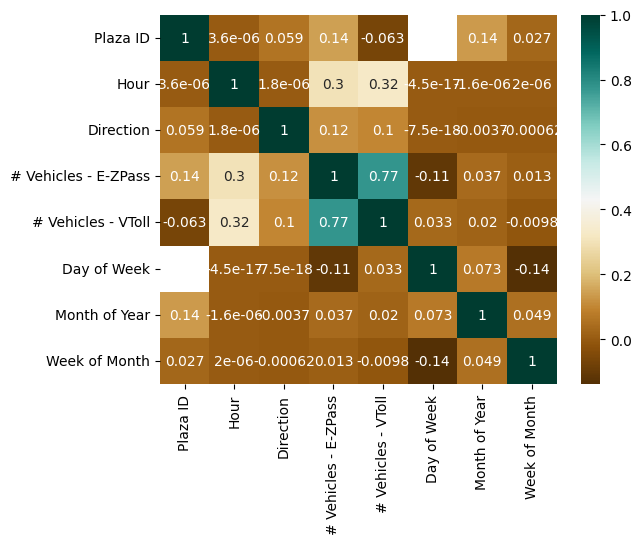

In [48]:
sample_to_correalte = sample_to_work_on.drop('Date',axis=1)

c = sample_to_correalte.corr(method='pearson') #makes correlation matrix
sns.heatmap(c,annot=True,cmap="BrBG")